## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [2]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [4]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [7]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [8]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [9]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0
...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,1.0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,1.0,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,1.0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,0.0,0,1


In [10]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

## **Curva de Validação**

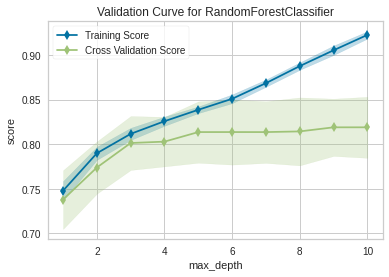

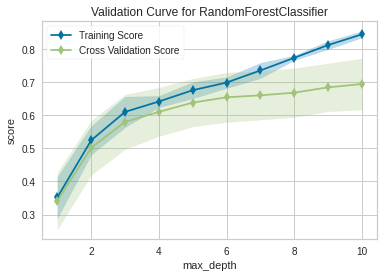

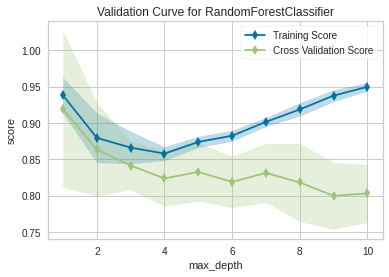

In [22]:
from yellowbrick.model_selection import (
    ValidationCurve,
)
from sklearn.ensemble import RandomForestClassifier

list_scoring = ['accuracy','recall','precision']
for scoring in list_scoring:
  fig, ax = plt.subplots(figsize=(6, 4))
  vc_viz = ValidationCurve(
      RandomForestClassifier(n_estimators=100),
      param_name="max_depth",
      param_range=np.arange(1, 11),
      cv=10,
      n_jobs=-1,
      scoring=scoring
  )
  vc_viz.fit(X, y)
  vc_viz.poof()

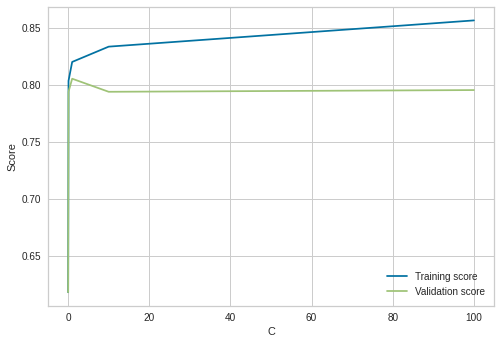

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Create an SVM classifier
clf = SVC(kernel='rbf')

# Create a range of values for the hyperparameter C
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Use ValidationCurve to evaluate the model using a range of C values
train_scores, val_scores = validation_curve(clf, X, y, param_name='C', param_range=param_range, cv=10, )

# Plot the training and validation scores
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(val_scores, axis=1), label='Validation score')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()
plt.show()

## **Curva de Aprendizado**

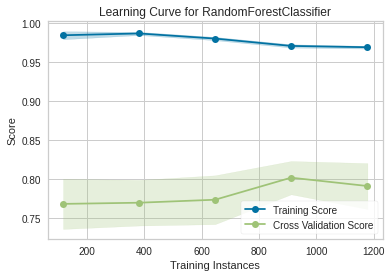

In [23]:
from yellowbrick.model_selection import (
    LearningCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(
    RandomForestClassifier(n_estimators=100),
    cv=10,
)
lc3_viz.fit(X, y)
lc3_viz.poof()